# Taller gradiente descendente

## Nombres
### Luisa Fernanda Cotte Sánchez y Cristian Giovanny Sánchez Pineda

In [36]:
# dependecias para todo el taller. No se deben agregar más dependecias
import numpy as np
from matplotlib import pyplot as plt

Carga de datos base:

In [37]:
tam = 300
x = np.linspace(0,5,tam)
t = np.sin(2*np.pi*x)+np.random.normal(0,0.4,tam)

1- Muestre la señal $t$ en un gráfico.

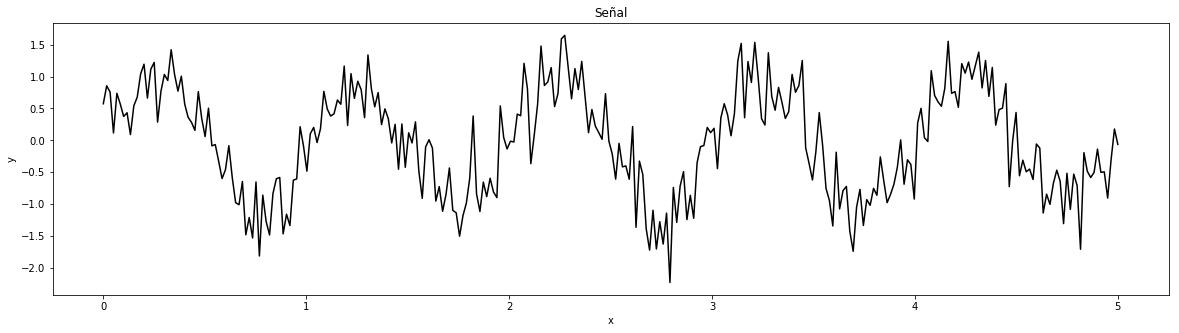

In [38]:
plt.figure(figsize=(20,5))
plt.plot(x, t, 'k')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Señal')
plt.show()

2- Usando mínimos cuadrados desarrolle para cada una de las tres de funciones base una solución que se ajuste a la señal mostrada en el punto anterior. Defina los valores de m y s en cada uno de los tres casos. Realice un gráfico comparativo para cada $\hat{t}$ vs t, y uno final de todas las $\hat{t}$s vs t. Muestré los errores de cada $\hat{t}$. Use subplot. ¿Que puede intepretar de los resultados? (1.2)

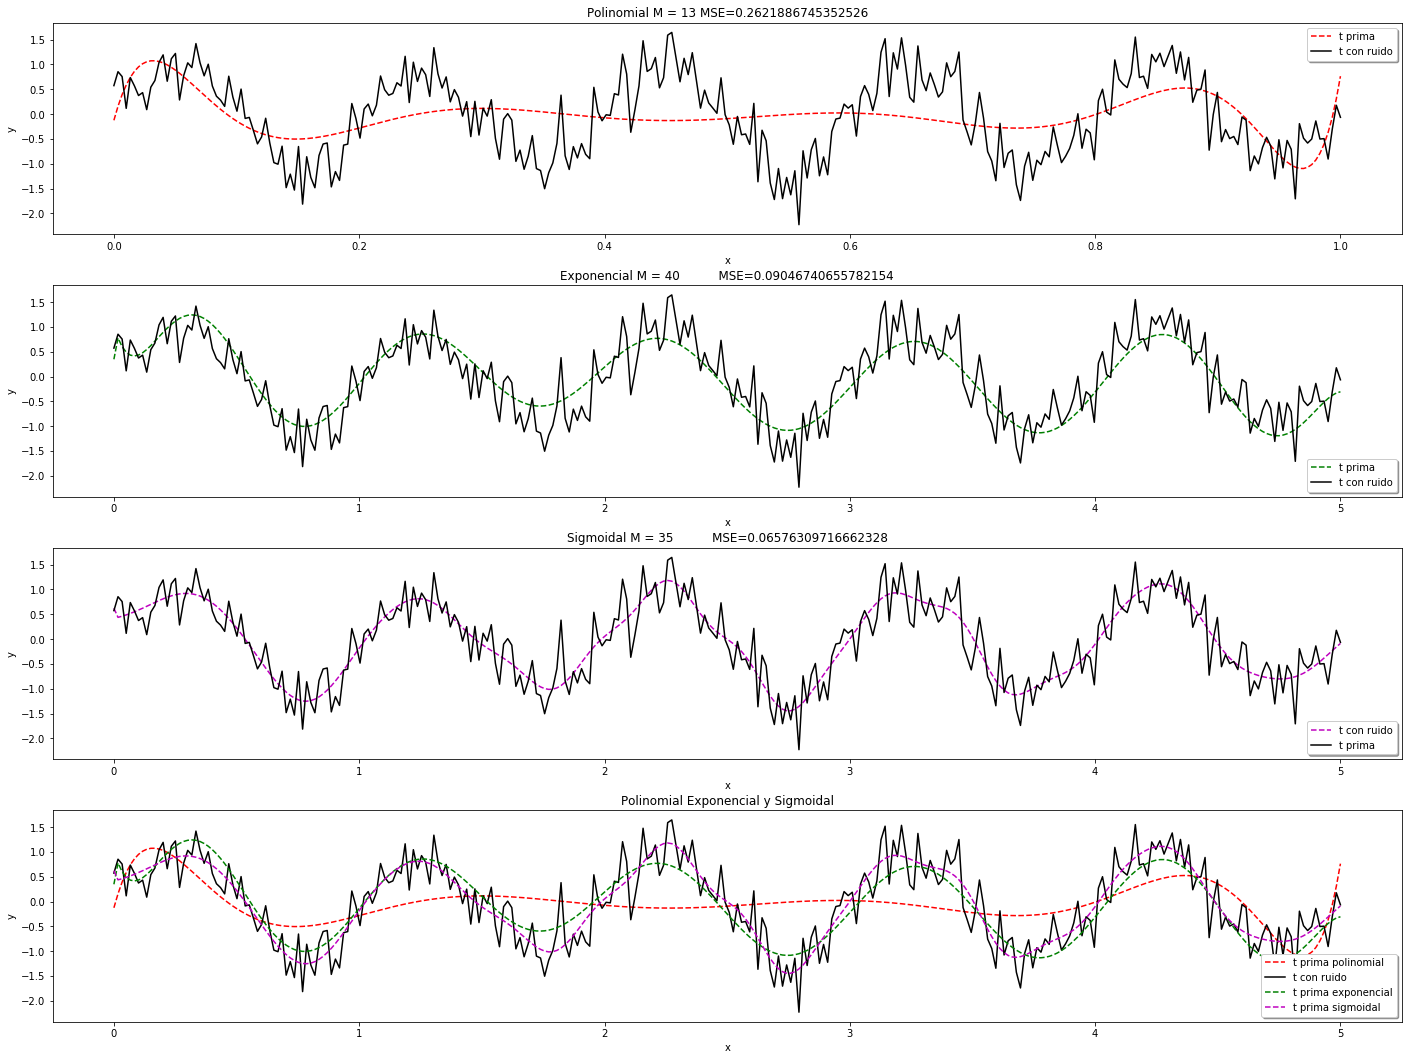

In [39]:
def get_polinomial(x, i):
    '''
    Obtiene la polinomial de x a la i
    '''
    return x**i

def get_exponential(x, miu, s=0.007):
    '''
    Obtiene la exponencial de x dependiendo de la función base
    '''
    return np.exp((-(((x-miu)**2)/(2*(s**2)))))

def get_sigmoidal(x, miu, s=0.01):
    '''
    Obtiene la sigmoidal de x dependiendo de la función base
    '''
    return 1/(1+np.exp(-((x-miu)/s)))

def polinomial(X, m, x, s=0):
    '''
    Llena la matriz X usando la función base polinomial
    '''
    i_limit, j_limit = X.shape
    for i in range(i_limit):
        for j in range(j_limit):
            X[i][j] = get_polinomial(x[i], j)
    X[:,0] = 1
            
def exponential(X, m, x, s=1):
    '''
    Llena la matriz X usando la función base exponencial
    '''
    i_limit, j_limit = X.shape
    for i in range(1, i_limit):
        for j in range(j_limit):
            X[i][j]= get_exponential(x[i], m[j], s)
    X[:,0] = 1
            
def sigmoidal(X, m, x, s=1):
    '''
    Llena la matriz X usando la función base sigmoidal
    '''
    i_limit, j_limit = X.shape
    
    for i in range(1, i_limit):
        for j in range(j_limit):
            X[i][j] = get_sigmoidal(x[i], m[j], s)
    X[:,0]=1

def get_phi(fn, x, m, s=1):
    '''
    Obtiene phi
    '''
    medium = np.linspace(0,5, m)#Necesario cambiarlo por el t
    X = np.zeros((len(x),m)) #Tamaño de t por m
    fn(X, medium, x, s)
    return X

def mean_square_error(Y):
    '''
    Calcula el error mediante la formula
    '''
    i_limit, j_limit = Y.shape
    error = 0    
    sum = 0
    for i in range(i_limit):
        for j in range(j_limit):
            sum += (Y[i][j]-t[i])**2
    error = (sum/(2*len(t)))
    
    return error

def get_W(phi,c=t):
    '''
    Calcula el W mediante la formula
    '''
    T = np.array([c])
    W = ((np.linalg.inv((phi.T.dot(phi)))).dot(phi.T)).dot(T.T)
    return W

def get_y_values(Y):
    '''
    Método que permite obtener los valores de Y
    '''
    y = Y[:,0]
    
    return y

#x1 = np.arange(0,len(t))#Tabular valores de x
#Para el polinomial linspace (0,1)
#print(W)
x1 = np.linspace(0, 1, len(t))
X = get_phi(polinomial, x1, 13)#Se crea phi
W = get_W(X)#Se Crea el primer W
Y = X.dot(W)#Se crean las predicciones
mse1 = mean_square_error(Y)#Se crea el error cuadrático medio
y = get_y_values(Y)#Valores de y para graficar 

#x1 = np.linspace(0,1,len(t)) #Asociado a la media 

X1 = get_phi(exponential, x, 40, 0.985)
W1 = get_W(X1)
Y1 = X1.dot(W1)
y1 = get_y_values(Y1)
mse2 =  mean_square_error(Y1)#Cambiar el w


X2 = get_phi(sigmoidal, x, 35, 0.2)
W2 = get_W(X2)
Y2 = X2.dot(W2)
y2 = get_y_values(Y2)
mse3 =  mean_square_error(Y2)


plt.subplots(4,1, figsize=(20,15))
plt.subplot(4,1,1)
plt.tight_layout(pad=3.0)
plt.plot(x1, y, 'r--', x1, t, 'k')
plt.title("Polinomial M = 13 MSE="+str(mse1))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t prima', 't con ruido'), loc='upper right', shadow=True)


plt.subplot(4,1,2)
plt.plot(x,y1,'g--', x, t, 'k')
plt.title("Exponencial M = 40          MSE="+str(mse2))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t prima', 't con ruido'), loc='lower right', shadow=True)

plt.subplot(4,1,3)
plt.plot(x, y2, 'm--', x, t, 'k')
plt.title("Sigmoidal M = 35          MSE="+str(mse3))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t con ruido', 't prima'), loc='lower right', shadow=True)


plt.subplot(4,1,4)
plt.plot(x, y, 'r--', x, t, 'k', x, y1, 'g--', x, y2, 'm--')
plt.title("Polinomial Exponencial y Sigmoidal")
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t prima polinomial', 't con ruido', 't prima exponencial', 't prima sigmoidal'), loc='lower right', shadow=True)


#En la ultima con POLINOMIAL, EXPONENCIAL, SIGMOIDAL, TCON RUIDO 
plt.show()

De la función polinomial, se observa que se tiene una aproximación a los datos al inicio y al final, y se parece a una función seno aplanada.

De la función exponencial se parece mucho a la función seno, teniendo un error muy bajo, generaliza muy bien los datos.

Para la función sigmoidal se ajusta mejor a los datos sin embargo, tiende a copiar un poco su comportamiento, no se parece mucho a la función seno, pero no copia la señal.

De las tres funciones, la que tuvo mejor comportamiento, es la función, exponencial, ya que la solución debe ser la función seno, aunque la sigmoidal tuvo un error más bajo que la exponencial.

3- Ahora programe una función para generar $w$ y $\hat{t}$ usando el algoritmo de gradiente descendente. Defina el caso de parada usando un error esperado y cantidad máxima de iteraciones (debe manejar ambos casos). Recuerde que la ecuación para calcular $w$ esta dada por:

$w_{j} = w_{j} - \alpha \Delta$

Retorne $w$, $\hat{t}$, el número de iteraciones y el error obtenido. (1.2). Una solución ideal no debe usar todas las iteraciones.

In [40]:
def delta(tp, tr, xj):
    return np.mean((tp-tr).dot(xj)) #xj es la columna directamente

def calErr (tp, tr):
    return np.mean((tp - tr)**2)/2

def get_relative_error(real, aprox):
    return np.absolute((real-aprox)/real)

def get_w_tp(phi, m, eE, iterations, a, W, relative):
    
    Tp = phi.dot(W)
    
    eO = 1000
    #print(Tp, " error 1: ", eO)
    #eE = 0.01#0.001 <- original lu
    #a = 0.00002
    cont = 0
    closed = False
    while eO > eE and cont < iterations and closed==False:     
        cont +=1
        for i in range(m):
            W[i] = W[i] - a * delta(Tp, t, phi.T[i]) #columna i de phi
            
        Tp = phi.dot(W)
        eO = calErr(Tp, t)
        if get_relative_error(eE, eO)<relative:
            closed = True
            
       
    return W, Tp, cont, eO


4- Usando las tres funciones base con los mismos $m$ obtenidos en el punto $2$, calcule $\hat{t}$ usando gradiente descendente y responda. 

¿Cuantas iteraciones tomó para el calculo de $w$?. 
¿Qué tan cerca quedo del $w$ generado con mínimos cuadrados?

Grafique los resultados obtenido realizando la comparación de t y $\hat{t}$. Muestre el número de interaciones, M y el error. (1.2)

X... check


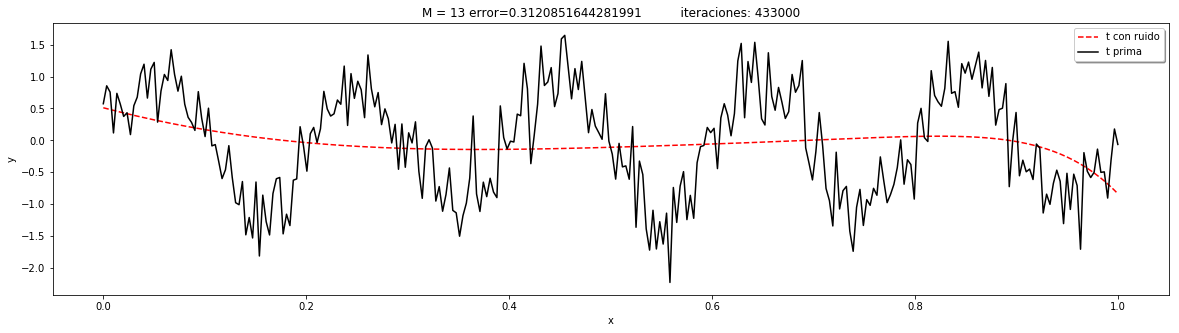

In [65]:
# pol = get_phi(polinomial, x, 1
W1 = np.random.rand(13)
w,tp,cont,eO = get_w_tp(X, 13, 0.285,433000, 0.0002, W1, 0.05)
print('X... check')

#plt.subplots(3,1, figsize=(20,15))
#plt.subplot(3,1,1)
plt.figure(figsize=(20,5)) 
plt.tight_layout(pad=3.0)
plt.plot(x1, tp, 'r--', x1, t, 'k')
plt.title("M = 13 error="+str(eO)+"          iteraciones: "+str(cont))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t con ruido', 't prima'), loc='upper right', shadow=True)

plt.show()

X1... check


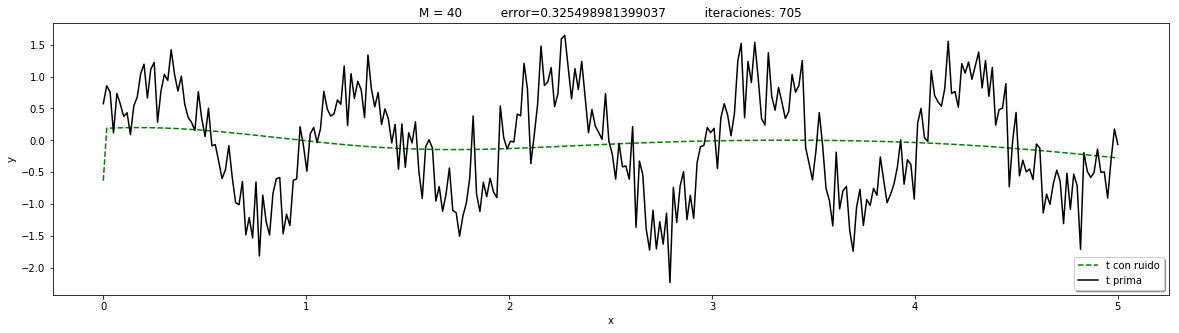

In [66]:
W2 = np.random.rand(40)
w1,tp1,cont1,eO1 = get_w_tp(X1, 40, 0.31, 433000, 0.0002, W2, 0.05)
print('X1... check')
#plt.subplot(3,1,2)
plt.figure(figsize=(20,5)) 
plt.plot(x,tp1,'g--', x, t, 'k')
plt.title("M = 40          error="+str(eO1) +"          iteraciones: "+str(cont1))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t con ruido', 't prima'), loc='lower right', shadow=True)

plt.show()

X2... check


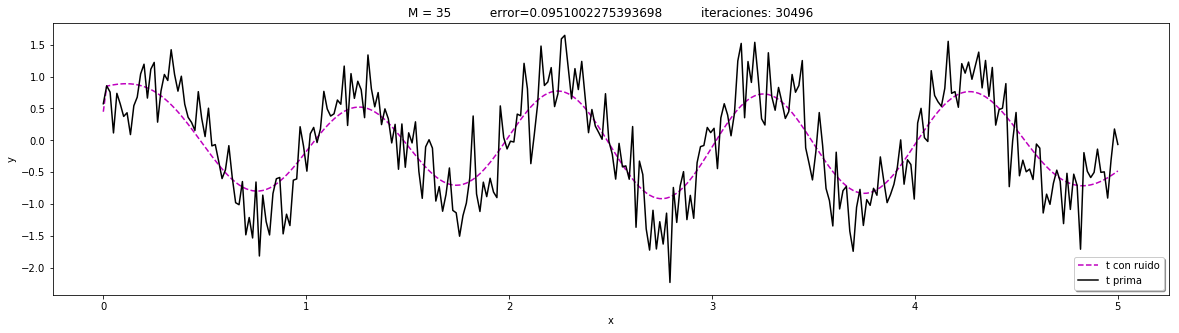

In [67]:
W3 = np.random.rand(35)
w2,tp2,cont2,eO2 = get_w_tp(X2, 35, 0.0943, 200300, 0.0002, W3, 0.0085)
print('X2... check')
#plt.subplot(3,1,3)
plt.figure(figsize=(20,5)) 
plt.plot(x, tp2, 'm--', x, t, 'k')
plt.title("M = 35          error="+str(eO2)+"          iteraciones: "+str(cont2))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t con ruido', 't prima'), loc='lower right', shadow=True)

plt.show()

5- Ahora haga el mismo ejercicio del punto 4 pero con $\phi$ normalizada. Compare las iteraciones, el error y $w$. Que puede intepretar de los resultados. (1.4)

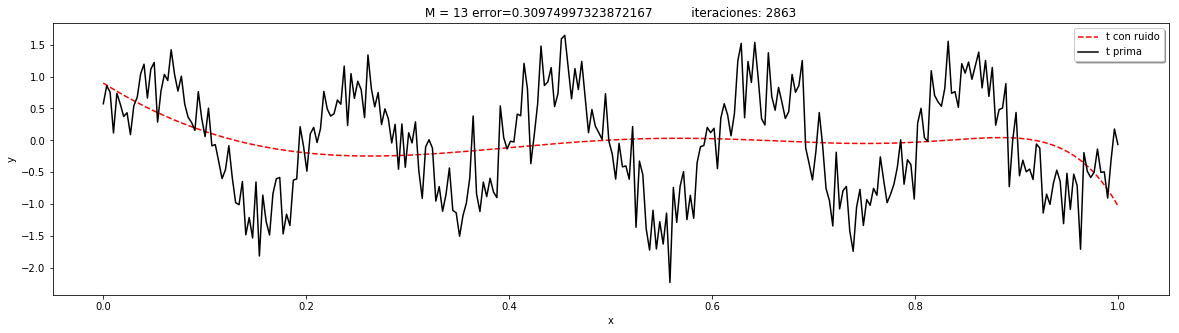

In [68]:
def normalize(X):
    Xcopy = np.copy(X)
    i_limit, j_limit = Xcopy.shape
    for i in range(1, j_limit):
        Xcopy[:,i] = ((Xcopy[:,i]-np.mean(Xcopy[:,i]))/np.std(Xcopy[:,i]))
    return Xcopy

Xcopy = normalize(X)
w3,tp3,cont3,eO3 = get_w_tp(Xcopy, 13, 0.295,433000, 0.0002, W1, 0.05)

plt.figure(figsize=(20,5)) 
#plt.subplots(3,1, figsize=(20,15))
plt.tight_layout(pad=3.0)
#plt.subplot(3,1,1)
plt.plot(x1, tp3, 'r--', x1, t, 'k')
plt.title("M = 13 error="+str(eO3)+"          iteraciones: "+str(cont3))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t con ruido', 't prima'), loc='upper right', shadow=True)
plt.show()

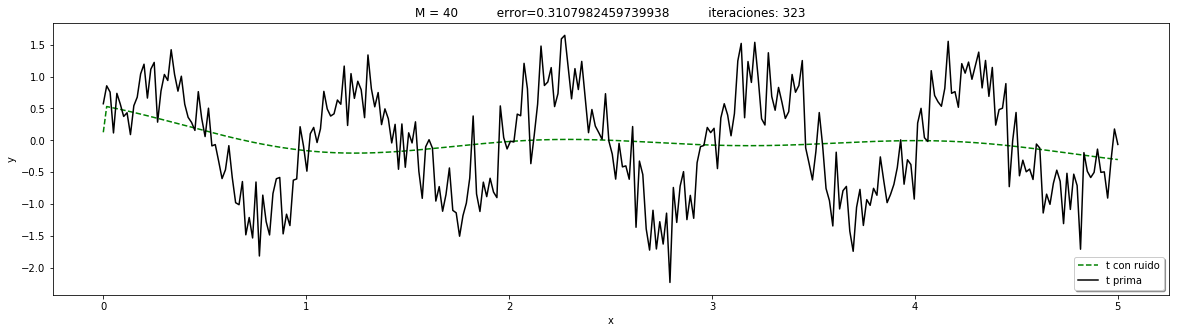

In [69]:
#plt.show()

Xcopy1 = normalize(X1)

w4,tp4,cont4,eO4 = get_w_tp(Xcopy1, 40, 0.296, 433000, 0.0002, W2,0.05)
#print('X1... check')
plt.figure(figsize=(20,5)) 
#plt.subplot(3,1,2)
plt.plot(x,tp4,'g--', x, t, 'k')
plt.title("M = 40          error="+str(eO4) +"          iteraciones: "+str(cont4))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t con ruido', 't prima'), loc='lower right', shadow=True)
plt.show()

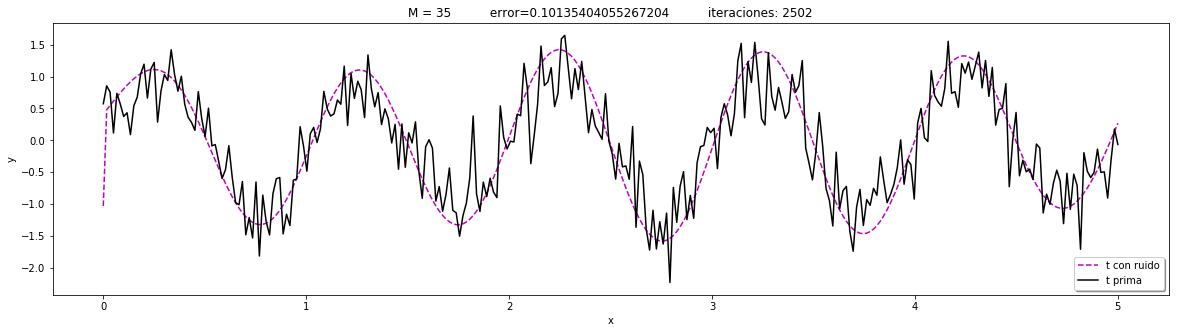

In [70]:
Xcopy2 = normalize(X2)

w5,tp5,cont5,eO5 = get_w_tp(Xcopy2, 35, 0.0943, 200300, 0.0002, W3, 0.075)
#print('X2... check')
#plt.subplot(3,1,3)
plt.figure(figsize=(20,5)) 
plt.plot(x, tp5, 'm--', x, t, 'k')
plt.title("M = 35          error="+str(eO5)+"          iteraciones: "+str(cont5))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t con ruido', 't prima'), loc='lower right', shadow=True)

plt.show()

Para la función polinomial, la predicción que se generó fue muy alejada a la esperada, incluso en sus primeras iteraciones el resultado obtenido no variaba mucho con respecto a anteriores. 

Para la función exponencial, se comportó muy alejado del w de la función base, ya que in usar el gradiente, generó un error considerablemente alto. No tuvo buen rendimiento con respecto a la función base. No tomó todas las iteraciones.

Para la función sigmoidal, obtuvo un error demasiado pequeño y un comportamiento muy similar a la función seno la cual permite generalizar los datos generados. No tomó todas las iteraciones.

La que mejor se comportó con respecto a la señal fue la sigmoidal, ya que se obtuvo la función seno, o muy similar.